In [1]:
#config.ipynb contains all the import
%run ../global_class/config.ipynb
#it's a the multipolygone of Shanghai
%run ../global_class/getShanghai.ipynb

In [2]:
df_weibo = pd.read_pickle('../pickles/utseus-shanghai-weibo-2012.pk')

In [3]:
df_weibo.head()

,status,weibo_user_id,created_at,weibo_user_id.1,gender,friends_count,followers_count,status_count,title,category_name,category_en_name,total_checkin_count,distinct_user_checkin_count,tip_count,geometry,latitude,longitude
0,吃火锅啦 我在#洪长兴羊肉馆(云南南路店)# http://t.cn/zOeOmRM,1153054312,2012-11-18 19:24:56+08,1153054312,m,45,56,41,洪长兴羊肉馆(云南南路店),火锅店,Hot Pot,710.0,672.0,441.0,POINT (121.48008 31.22884),31.230801,121.475578
3,The food just so so here [围脖] 我在#首尔焖鲜汇# http:/...,1765471642,2012-12-02 17:57:53+08,1765471642,f,229,192,381,首尔焖鲜汇,韩国料理,Korean cuisine,810.0,730.0,794.0,POINT (121.418148 31.168315),31.170186,121.413509
4,老公和同事饭局间作一打游诗:我坐2 号头，你坐2号尾， 日日思君不见君，共坐2号轨。致静安女...,2709940290,2012-12-02 22:00:10+08,2709940290,f,15,51,13,磁浮龙阳路站,出行住宿,Travel accommodation,2584.0,2277.0,727.0,POINT (121.55832 31.2024),31.204582,121.554073
5,周杰伦又出新歌了 没感觉 我在#上海师范大学(徐汇校区)图书馆# http://t.cn/...,3084574001,2012-12-05 15:38:30+08,3084574001,m,52,62,40,上海师范大学(徐汇校区)图书馆,校园生活,Campus Life,66.0,51.0,66.0,POINT (121.418045 31.168773),31.170644,121.413406
6,我在上海久光yes馆@晨辰288 @C油条 @兜兜脑稀考册的丶 @上海久光 我在#久光百货#...,3172562811,2012-12-06 10:11:58+08,3172562811,m,28,10,2,久光百货,商场,Market,6436.0,5492.0,722.0,POINT (121.447 31.22393),31.225812,121.442402


In [4]:
df_weibo.describe()

,weibo_user_id,weibo_user_id.1,friends_count,followers_count,status_count,total_checkin_count,distinct_user_checkin_count,tip_count,latitude,longitude
count,5.150110e+05,5.150110e+05,515011.00000,515011.000000,515011.000000,501330.000000,501330.00000,501330.000000,515011.000000,515011.000000
mean,1.998557e+09,1.998557e+09,242.48517,630.234486,1740.308568,1570.417763,1168.41512,457.959382,31.236081,121.466809
std,4.294121e+08,4.294121e+08,233.90130,5120.852436,2572.828573,2871.141019,2253.41922,522.192742,0.050060,0.062522
min,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,30.978018,121.099405
25%,1.758617e+09,1.758617e+09,107.00000,113.000000,357.000000,141.000000,70.00000,111.000000,31.201494,121.422559
50%,1.908998e+09,1.908998e+09,185.00000,221.000000,953.000000,465.000000,277.00000,286.000000,31.231786,121.464681
75%,2.244308e+09,2.244308e+09,300.00000,441.000000,2141.000000,1518.000000,1143.00000,608.000000,31.272374,121.509496
max,3.230455e+09,3.230455e+09,3000.00000,832916.000000,93840.000000,31487.000000,26441.00000,6081.000000,31.514444,121.800212


In [5]:
#df_weibo has value
print(len(df_weibo))
print(len(df_weibo.dropna()))
df_weibo = df_weibo.dropna()

515011
501330


In [6]:
print(type(df_weibo.category_en_name.iloc[0]))
print(type(df_weibo.longitude.iloc[0]))
print(type(df_weibo.latitude.iloc[0]))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [7]:
df_weibo = df_weibo.drop(columns=['geometry'])
gdf_weibo = gpd.GeoDataFrame(df_weibo, geometry = [Point(x,y) for x,y in zip(df_weibo.longitude, df_weibo.latitude)])
gdf_weibo.crs = {'init': 'epsg:4479'} #china metric projection

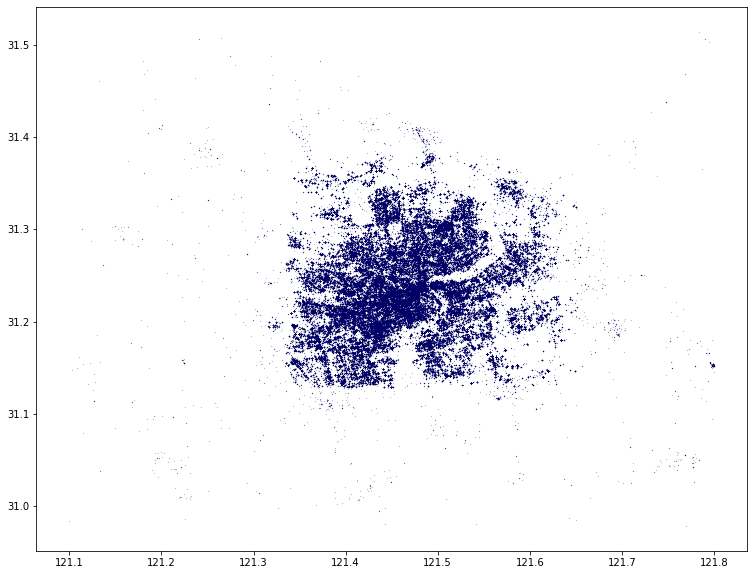

In [8]:
gdf_weibo.plot(markersize=0.01, c='#000066', figsize=(15,10))

In [9]:
time = ManagingTime()
time.displayStartTime()

gdf_weibo = gdf_weibo.loc[gdf_weibo.within(shanghai)]

time.displayRunningTime()

Starting time: 2020-01-05 23:47:12.421259
Running time: 0:05:02.809412


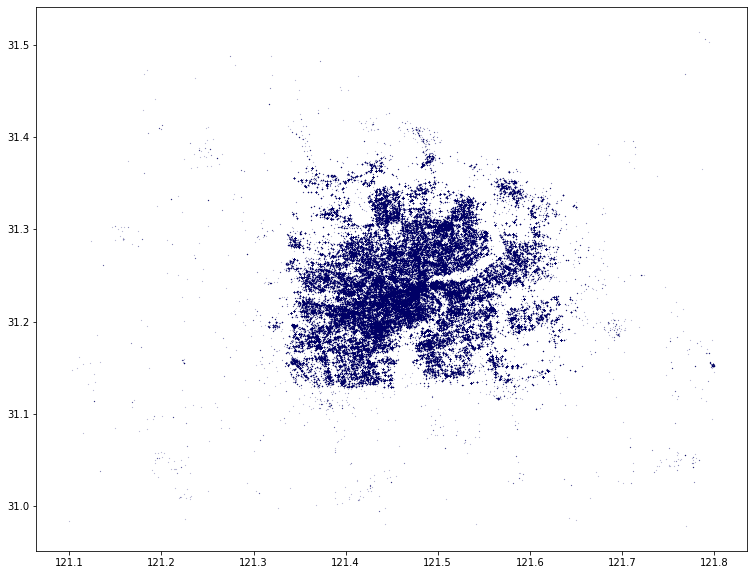

In [10]:
gdf_weibo.plot(markersize=0.01, c='#000066', figsize=(15,10))

In [12]:
print(len(gdf_weibo))
# We removed ? points outside of Shanghai

501313


In [13]:
gdf_weibo.head()

,status,weibo_user_id,created_at,weibo_user_id.1,gender,friends_count,followers_count,status_count,title,category_name,category_en_name,total_checkin_count,distinct_user_checkin_count,tip_count,latitude,longitude,geometry
0,吃火锅啦 我在#洪长兴羊肉馆(云南南路店)# http://t.cn/zOeOmRM,1153054312,2012-11-18 19:24:56+08,1153054312,m,45,56,41,洪长兴羊肉馆(云南南路店),火锅店,Hot Pot,710.0,672.0,441.0,31.230801,121.475578,POINT (121.4755783491347 31.2308007626706)
3,The food just so so here [围脖] 我在#首尔焖鲜汇# http:/...,1765471642,2012-12-02 17:57:53+08,1765471642,f,229,192,381,首尔焖鲜汇,韩国料理,Korean cuisine,810.0,730.0,794.0,31.170186,121.413509,POINT (121.4135088109546 31.17018604102877)
4,老公和同事饭局间作一打游诗:我坐2 号头，你坐2号尾， 日日思君不见君，共坐2号轨。致静安女...,2709940290,2012-12-02 22:00:10+08,2709940290,f,15,51,13,磁浮龙阳路站,出行住宿,Travel accommodation,2584.0,2277.0,727.0,31.204582,121.554073,POINT (121.5540733738165 31.20458150043122)
5,周杰伦又出新歌了 没感觉 我在#上海师范大学(徐汇校区)图书馆# http://t.cn/...,3084574001,2012-12-05 15:38:30+08,3084574001,m,52,62,40,上海师范大学(徐汇校区)图书馆,校园生活,Campus Life,66.0,51.0,66.0,31.170644,121.413406,POINT (121.413405683464 31.17064373354285)
6,我在上海久光yes馆@晨辰288 @C油条 @兜兜脑稀考册的丶 @上海久光 我在#久光百货#...,3172562811,2012-12-06 10:11:58+08,3172562811,m,28,10,2,久光百货,商场,Market,6436.0,5492.0,722.0,31.225812,121.442402,POINT (121.442402121309 31.22581221525734)


In [14]:
#there are duplicated status in cendus_poi dataset
len(gdf_weibo[gdf_weibo.duplicated(keep = 'first', subset=gdf_weibo.columns.difference(['geometry','created_at']))])

1959

In [15]:
gdf_weibo = gdf_weibo.drop_duplicates(keep = 'first', subset=gdf_weibo.columns.difference(['geometry','created_at']))

In [16]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]


gdf_weibo['longitude_m'] = gdf_weibo[['longitude', 'latitude']].copy().apply(getNewLongitude, axis=1)
gdf_weibo['latitude_m'] = gdf_weibo[['longitude', 'latitude']].copy().apply(getNewLatitude, axis=1)

In [17]:
gdf_weibo = gdf_weibo[['created_at','friends_count','followers_count','status_count','category_en_name','total_checkin_count','tip_count','longitude','latitude','longitude_m','latitude_m']]

In [18]:
gdf_weibo.head()

,created_at,friends_count,followers_count,status_count,category_en_name,total_checkin_count,tip_count,longitude,latitude,longitude_m,latitude_m
0,2012-11-18 19:24:56+08,45,56,41,Hot Pot,710.0,441.0,121.475578,31.230801,-2.850214e+06,4.655580e+06
3,2012-12-02 17:57:53+08,229,192,381,Korean cuisine,810.0,794.0,121.413509,31.170186,-2.846984e+06,4.661636e+06
4,2012-12-02 22:00:10+08,15,51,13,Travel accommodation,2584.0,727.0,121.554073,31.204582,-2.857378e+06,4.652955e+06
5,2012-12-05 15:38:30+08,52,62,40,Campus Life,66.0,66.0,121.413406,31.170644,-2.846961e+06,4.661619e+06
6,2012-12-06 10:11:58+08,28,10,2,Market,6436.0,722.0,121.442402,31.225812,-2.847667e+06,4.657474e+06


In [19]:
gdf_weibo = gpd.GeoDataFrame(gdf_weibo, geometry = [Point(x,y) for x,y in zip(gdf_weibo.longitude_m, gdf_weibo.latitude_m)])
gdf_weibo.crs = {'init': 'epsg:4479'} #china metric projection

In [20]:
gdf_weibo.to_pickle('../clean_pickles/weibo.pk')

In [21]:
gdf_weibo = pd.read_pickle('../clean_pickles/weibo.pk')

In [22]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [23]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = 'geometry')
#gdf_target.crs = {'init': 'epsg:4479'} #china metric projection

In [24]:
gdf_weibo.head()

,created_at,friends_count,followers_count,status_count,category_en_name,total_checkin_count,tip_count,longitude,latitude,longitude_m,latitude_m,geometry
0,2012-11-18 19:24:56+08,45,56,41,Hot Pot,710.0,441.0,121.475578,31.230801,-2.850214e+06,4.655580e+06,POINT (-2850214.107262154 4655579.793747897)
3,2012-12-02 17:57:53+08,229,192,381,Korean cuisine,810.0,794.0,121.413509,31.170186,-2.846984e+06,4.661636e+06,POINT (-2846983.541132796 4661635.9292541)
4,2012-12-02 22:00:10+08,15,51,13,Travel accommodation,2584.0,727.0,121.554073,31.204582,-2.857378e+06,4.652955e+06,POINT (-2857378.00897865 4652954.5540685)
5,2012-12-05 15:38:30+08,52,62,40,Campus Life,66.0,66.0,121.413406,31.170644,-2.846961e+06,4.661619e+06,POINT (-2846961.460965116 4661618.63817321)
6,2012-12-06 10:11:58+08,28,10,2,Market,6436.0,722.0,121.442402,31.225812,-2.847667e+06,4.657474e+06,POINT (-2847667.470867002 4657474.032837262)


In [25]:
#nombre de valeur null négligeable..
len(gdf_weibo['tip_count'][gdf_weibo['tip_count'] == 0])

385

In [26]:
#need 22:46 to run
time = ManagingTime()
time.displayStartTime()

area_buffer = gdf_target['surface_buffer'].iloc[0].area
gdf_target['nb_poi_weibo'] = np.nan
gdf_target['av_friends_count_weibo'] = np.nan
gdf_target['av_followers_count_weibo'] = np.nan
gdf_target['av_status_count_weibo'] = np.nan
gdf_target['av_total_checkin_count_weibo'] = np.nan
gdf_target['av_tip_count_weibo'] = np.nan
for index,value in gdf_target.iterrows():
    clear_output()
    time.displayStartTime()
    print(index)
    gdf_weibo_temp = gdf_weibo.loc[gdf_weibo.within(value.surface_buffer)]
    gdf_target['nb_poi_weibo'].loc[index] = len(gdf_weibo_temp) / area_buffer
    gdf_target['av_friends_count_weibo'].loc[index] = gdf_weibo_temp['friends_count'].mean()
    gdf_target['av_followers_count_weibo'].loc[index] = gdf_weibo_temp['followers_count'].mean()
    gdf_target['av_status_count_weibo'].loc[index] = gdf_weibo_temp['status_count'].mean()
    gdf_target['av_total_checkin_count_weibo'].loc[index] = gdf_weibo_temp['total_checkin_count'].mean()
    gdf_target['av_tip_count_weibo'].loc[index] = gdf_weibo_temp['tip_count'].mean()

gdf_target.to_pickle('../clean_pickles/target_weibo.pk')

time.displayEndTime()
time.displayRunningTime()

Starting time: 2020-01-06 09:54:13.886735
466
Ending time: 2020-01-06 10:19:20.875235
Running time: 0:25:06.988500


In [27]:
gdf_target.head()

,clean,smell,noise,longitude,latitude,geometry,longitude_m,latitude_m,surface_buffer,nb_poi_weibo,av_friends_count_weibo,av_followers_count_weibo,av_status_count_weibo,av_total_checkin_count_weibo,av_tip_count_weibo
0,3,0.0,0.0,121.104287,31.155882,POINT (-2822207.586532274 4677635.626522204),-2.822208e+06,4.677636e+06,POLYGON ((-2821707.586532274 4677635.626522204...,0.000000,NaN,NaN,NaN,NaN,NaN
1,3,1.0,0.0,121.351529,31.144327,POINT (-2842710.938446562 4665979.72602233),-2.842711e+06,4.665980e+06,"POLYGON ((-2842210.938446562 4665979.72602233,...",0.000534,206.596659,798.828162,1338.816229,326.477327,153.508353
2,2,0.0,0.0,121.468520,31.042285,POINT (-2855282.42475198 4665148.863744967),-2.855282e+06,4.665149e+06,"POLYGON ((-2854782.42475198 4665148.863744967,...",0.000000,NaN,NaN,NaN,NaN,NaN
3,3,0.0,0.0,121.367237,31.240725,POINT (-2841108.748930959 4660473.749148724),-2.841109e+06,4.660474e+06,POLYGON ((-2840608.748930959 4660473.749148724...,0.001180,216.571892,365.593514,1840.671351,299.054054,214.621622
4,2,NaN,0.0,121.403601,31.269155,POINT (-2843213.856075277 4657273.732656028),-2.843214e+06,4.657274e+06,POLYGON ((-2842713.856075277 4657273.732656028...,0.002596,227.860511,631.961690,1737.999018,860.462672,399.309430
